In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
# from collections import Counter
import numpy as np
# import sys
import matplotlib.pyplot as plt

# Process Data

## read coordinate

In [3]:
coord_df = pd.read_excel('data/coord.xls', index_col=[0], skiprows=[3, 10, 71])
coord_df

,x,y
node_id,,
D1,121,8
D2,193,137
Z01,205,92
Z02,159,62
Z03,143,38
Z04,108,80
Z05,55,38
Z06,62,105
F01,135,142


In [4]:
coord_dict = {}
for node, row in coord_df.iterrows():
    coord_dict[node] = (row.x, row.y)

coord_dict

{'D1': (121, 8),
 'D2': (193, 137),
 'F01': (135, 142),
 'F02': (127, 143),
 'F03': (124, 129),
 'F04': (115, 130),
 'F05': (105, 130),
 'F06': (108, 145),
 'F07': (90, 145),
 'F08': (72, 142),
 'F09': (60, 139),
 'F10': (70, 121),
 'F11': (100, 121),
 'F12': (53, 132),
 'F13': (37, 127),
 'F14': (25, 120),
 'F15': (15, 115),
 'F16': (7, 105),
 'F17': (28, 106),
 'F18': (24, 90),
 'F19': (45, 90),
 'F20': (49, 82),
 'F21': (16, 76),
 'F22': (15, 70),
 'F23': (14, 56),
 'F24': (168, 126),
 'F25': (165, 117),
 'F26': (165, 105),
 'F27': (145, 113),
 'F28': (132, 100),
 'F29': (130, 94),
 'F30': (130, 80),
 'F31': (110, 100),
 'F32': (114, 90),
 'F33': (95, 90),
 'F34': (95, 77),
 'F35': (106, 63),
 'F36': (86, 75),
 'F37': (72, 70),
 'F38': (74, 60),
 'F39': (79, 53),
 'F40': (68, 46),
 'F41': (46, 20),
 'F42': (59, 15),
 'F43': (77, 5),
 'F44': (240, 127),
 'F45': (240, 107),
 'F46': (230, 100),
 'F47': (220, 98),
 'F48': (158, 77),
 'F49': (176, 75),
 'F50': (206, 77),
 'F51': (184, 62

## read distance

In [5]:
distance_df = pd.read_csv('data/distance.txt', sep=' ', index_col=[0, 1], names=['none', 'distance'])
distance_df

none    distance
D1  D1    NaN    0.000000
    D2    NaN  147.732867
    Z01   NaN  118.793939
    Z02   NaN   66.030296
    Z03   NaN   37.202150
    Z04   NaN   73.164199
    Z05   NaN   72.498276
    Z06   NaN  113.534136
    F01   NaN  134.729358
    F02   NaN  135.133268
    F03   NaN  121.037184
    F04   NaN  122.147452
    F05   NaN  123.044707
    F06   NaN  137.615406
    F07   NaN  140.463518
    F08   NaN  142.677959
    F09   NaN  144.506055
    F10   NaN  123.975804
    F11   NaN  114.934764
    F12   NaN  141.421356
    F13   NaN  145.660564
    F14   NaN  147.512711
    F15   NaN  150.615404
    F16   NaN  149.682998
    F17   NaN  135.103664
    F18   NaN  127.015747
    F19   NaN  111.803399
    F20   NaN  103.247276
    F21   NaN  125.095963
    F22   NaN  122.800651
...       ...         ...
J62 J33   NaN   99.924972
    J34   NaN  101.019800
    J35   NaN  110.453610
    J36   NaN  100.124922
    J37   NaN  129.247824
    J38   NaN  122.249744
    J39   NaN  148.003378
    J40   NaN  137.568165
    J41   NaN  157.835357
    J42   NaN  122.983739
    J43   NaN  181.099420
    J44   NaN  156.003205
    J45   NaN  134.182711
    J46   NaN  134.372616
    J47   NaN   97.082439
    J48   NaN   87.206651
    J49   NaN   75.604233
    J50   NaN   58.872744
    J51   NaN   79.056942
    J52   NaN   77.878110
    J53   NaN   41.593269
    J54   NaN   56.824291
    J55   NaN   41.109610
    J56   NaN   31.780497
    J57   NaN   51.865210
    J58   NaN   37.363083
    J59   NaN   24.083189
    J60   NaN   23.323808
    J61   NaN   54.230987
    J62   NaN    0.000000

[16900 rows x 2 columns]

In [6]:
distance_df.drop('none', axis=1, inplace=True)
distance_df

distance
D1  D1     0.000000
    D2   147.732867
    Z01  118.793939
    Z02   66.030296
    Z03   37.202150
    Z04   73.164199
    Z05   72.498276
    Z06  113.534136
    F01  134.729358
    F02  135.133268
    F03  121.037184
    F04  122.147452
    F05  123.044707
    F06  137.615406
    F07  140.463518
    F08  142.677959
    F09  144.506055
    F10  123.975804
    F11  114.934764
    F12  141.421356
    F13  145.660564
    F14  147.512711
    F15  150.615404
    F16  149.682998
    F17  135.103664
    F18  127.015747
    F19  111.803399
    F20  103.247276
    F21  125.095963
    F22  122.800651
...             ...
J62 J33   99.924972
    J34  101.019800
    J35  110.453610
    J36  100.124922
    J37  129.247824
    J38  122.249744
    J39  148.003378
    J40  137.568165
    J41  157.835357
    J42  122.983739
    J43  181.099420
    J44  156.003205
    J45  134.182711
    J46  134.372616
    J47   97.082439
    J48   87.206651
    J49   75.604233
    J50   58.872744
    J51   79.056942
    J52   77.878110
    J53   41.593269
    J54   56.824291
    J55   41.109610
    J56   31.780497
    J57   51.865210
    J58   37.363083
    J59   24.083189
    J60   23.323808
    J61   54.230987
    J62    0.000000

[16900 rows x 1 columns]

In [7]:
distance_df.index

MultiIndex(levels=[['D1', 'D2', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57', 'F58', 'F59', 'F60', 'J01', 'J02', 'J03', 'J04', 'J05', 'J06', 'J07', 'J08', 'J09', 'J10', 'J11', 'J12', 'J13', 'J14', 'J15', 'J16', 'J17', 'J18', 'J19', 'J20', 'J21', 'J22', 'J23', 'J24', 'J25', 'J26', 'J27', 'J28', 'J29', 'J30', 'J31', 'J32', 'J33', 'J34', 'J35', 'J36', 'J37', 'J38', 'J39', 'J40', 'J41', 'J42', 'J43', 'J44', 'J45', 'J46', 'J47', 'J48', 'J49', 'J50', 'J51', 'J52', 'J53', 'J54', 'J55', 'J56', 'J57', 'J58', 'J59', 'J60', 'J61', 'J62', 'Z01', 'Z02', 'Z03', 'Z04', 'Z05', 'Z06'], ['D1', 'D2', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F

In [8]:
# 待机1-2 - 转载3-8 - 发射9-68 节点69-130 
node_names = ['D1', 'D2', 'Z01', 'Z02', 'Z03', 'Z04', 'Z05', 'Z06', 'F01', 'F02', 'F03', 'F04', 'F05',
             'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
             'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35',
             'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50',
             'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57', 'F58', 'F59', 'F60', 'J01', 'J02', 'J03', 'J04', 'J05', 'J06', 'J07',
             'J08', 'J09', 'J10', 'J11', 'J12', 'J13', 'J14', 'J15', 'J16', 'J17', 'J18', 'J19', 'J20', 'J21', 'J22',
             'J23', 'J24', 'J25', 'J26', 'J27', 'J28', 'J29', 'J30', 'J31', 'J32', 'J33', 'J34', 'J35', 'J36', 'J37',
             'J38', 'J39', 'J40', 'J41', 'J42', 'J43', 'J44', 'J45', 'J46', 'J47', 'J48', 'J49', 'J50', 'J51', 'J52',
             'J53', 'J54', 'J55', 'J56', 'J57', 'J58', 'J59', 'J60', 'J61', 'J62', ]
node_names

['D1',
 'D2',
 'Z01',
 'Z02',
 'Z03',
 'Z04',
 'Z05',
 'Z06',
 'F01',
 'F02',
 'F03',
 'F04',
 'F05',
 'F06',
 'F07',
 'F08',
 'F09',
 'F10',
 'F11',
 'F12',
 'F13',
 'F14',
 'F15',
 'F16',
 'F17',
 'F18',
 'F19',
 'F20',
 'F21',
 'F22',
 'F23',
 'F24',
 'F25',
 'F26',
 'F27',
 'F28',
 'F29',
 'F30',
 'F31',
 'F32',
 'F33',
 'F34',
 'F35',
 'F36',
 'F37',
 'F38',
 'F39',
 'F40',
 'F41',
 'F42',
 'F43',
 'F44',
 'F45',
 'F46',
 'F47',
 'F48',
 'F49',
 'F50',
 'F51',
 'F52',
 'F53',
 'F54',
 'F55',
 'F56',
 'F57',
 'F58',
 'F59',
 'F60',
 'J01',
 'J02',
 'J03',
 'J04',
 'J05',
 'J06',
 'J07',
 'J08',
 'J09',
 'J10',
 'J11',
 'J12',
 'J13',
 'J14',
 'J15',
 'J16',
 'J17',
 'J18',
 'J19',
 'J20',
 'J21',
 'J22',
 'J23',
 'J24',
 'J25',
 'J26',
 'J27',
 'J28',
 'J29',
 'J30',
 'J31',
 'J32',
 'J33',
 'J34',
 'J35',
 'J36',
 'J37',
 'J38',
 'J39',
 'J40',
 'J41',
 'J42',
 'J43',
 'J44',
 'J45',
 'J46',
 'J47',
 'J48',
 'J49',
 'J50',
 'J51',
 'J52',
 'J53',
 'J54',
 'J55',
 'J56',
 'J57',
 '

In [9]:
node_name_to_index = {node_name: i for i, node_name in enumerate(node_names)}
node_name_to_index

{'D1': 0,
 'D2': 1,
 'F01': 8,
 'F02': 9,
 'F03': 10,
 'F04': 11,
 'F05': 12,
 'F06': 13,
 'F07': 14,
 'F08': 15,
 'F09': 16,
 'F10': 17,
 'F11': 18,
 'F12': 19,
 'F13': 20,
 'F14': 21,
 'F15': 22,
 'F16': 23,
 'F17': 24,
 'F18': 25,
 'F19': 26,
 'F20': 27,
 'F21': 28,
 'F22': 29,
 'F23': 30,
 'F24': 31,
 'F25': 32,
 'F26': 33,
 'F27': 34,
 'F28': 35,
 'F29': 36,
 'F30': 37,
 'F31': 38,
 'F32': 39,
 'F33': 40,
 'F34': 41,
 'F35': 42,
 'F36': 43,
 'F37': 44,
 'F38': 45,
 'F39': 46,
 'F40': 47,
 'F41': 48,
 'F42': 49,
 'F43': 50,
 'F44': 51,
 'F45': 52,
 'F46': 53,
 'F47': 54,
 'F48': 55,
 'F49': 56,
 'F50': 57,
 'F51': 58,
 'F52': 59,
 'F53': 60,
 'F54': 61,
 'F55': 62,
 'F56': 63,
 'F57': 64,
 'F58': 65,
 'F59': 66,
 'F60': 67,
 'J01': 68,
 'J02': 69,
 'J03': 70,
 'J04': 71,
 'J05': 72,
 'J06': 73,
 'J07': 74,
 'J08': 75,
 'J09': 76,
 'J10': 77,
 'J11': 78,
 'J12': 79,
 'J13': 80,
 'J14': 81,
 'J15': 82,
 'J16': 83,
 'J17': 84,
 'J18': 85,
 'J19': 86,
 'J20': 87,
 'J21': 88,
 'J22': 89

## read connection matrix

In [10]:
connection_matrix_df = pd.read_excel('data/connection_matrix.xlsx', header=None)
connection_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
connection_array = connection_matrix_df.values
print(connection_array.shape)
connection_array

(130, 130)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [12]:
connected_pairs_1 = np.argwhere(connection_array == 1)
connected_pairs_2 = np.argwhere(connection_array == 2)
connected_pairs_1.shape
connected_pairs_1.dtype
connected_pairs_1
connected_pairs_2

array([[68, 69],
       [69, 68],
       [69, 70],
       [70, 69],
       [70, 71],
       [71, 70],
       [71, 72],
       [72, 71],
       [72, 73],
       [73, 72],
       [73, 74],
       [74, 73],
       [74, 75],
       [75, 74],
       [75, 76],
       [76, 75],
       [76, 77],
       [77, 76],
       [77, 78],
       [78, 77],
       [79, 80],
       [80, 79],
       [80, 81],
       [81, 80],
       [81, 82],
       [82, 81],
       [82, 83],
       [83, 82],
       [83, 84],
       [84, 83],
       [84, 85],
       [85, 84],
       [85, 86],
       [86, 85],
       [86, 87],
       [87, 86]])

In [13]:
connected_pairs = np.concatenate((connected_pairs_1, connected_pairs_2), axis=0)
connected_pairs

array([[  0,   4],
       [  0,  76],
       [  0,  77],
       [  0,  78],
       [  1,  69],
       [  1,  70],
       [  1,  79],
       [  1,  99],
       [  2,  71],
       [  2, 115],
       [  2, 117],
       [  3, 118],
       [  3, 119],
       [  3, 121],
       [  4,   0],
       [  4,  76],
       [  4, 119],
       [  4, 124],
       [  4, 128],
       [  5,  74],
       [  5, 104],
       [  5, 105],
       [  6, 108],
       [  6, 111],
       [  7,  83],
       [  7,  92],
       [  7,  93],
       [  7,  95],
       [  8,  88],
       [  9,  88],
       [ 10,  88],
       [ 11,  89],
       [ 12,  89],
       [ 13,  89],
       [ 14,  90],
       [ 15,  91],
       [ 16,  91],
       [ 17,  92],
       [ 18,  92],
       [ 19,  93],
       [ 20,  93],
       [ 21,  94],
       [ 22,  94],
       [ 23,  94],
       [ 24,  94],
       [ 25,  95],
       [ 26,  95],
       [ 27,  96],
       [ 28,  97],
       [ 29,  97],
       [ 30,  98],
       [ 31,  99],
       [ 32,

In [14]:
def remove_repeat(connected_pairs):
    pairs_no_repeat = []
    for pair in connected_pairs:
        pair = list(pair)
        if pair[1] < pair[0]:
            pair = [pair[1], pair[0]]
        if pair in pairs_no_repeat:
            continue
        pairs_no_repeat.append(pair)
    #     print(pair)
    print(len(pairs_no_repeat))
    return pairs_no_repeat

In [15]:
pairs_no_repeat_1 = remove_repeat(connected_pairs_1)
pairs_no_repeat_2 = remove_repeat(connected_pairs_2)

157
18


In [16]:
pairs_no_repeat_2

[[68, 69],
 [69, 70],
 [70, 71],
 [71, 72],
 [72, 73],
 [73, 74],
 [74, 75],
 [75, 76],
 [76, 77],
 [77, 78],
 [79, 80],
 [80, 81],
 [81, 82],
 [82, 83],
 [83, 84],
 [84, 85],
 [85, 86],
 [86, 87]]

## Plot 

In [17]:
for idx, row in coord_df.iterrows():
    print(idx)
    print(row)
    break

D1
x    121
y      8
Name: D1, dtype: int64


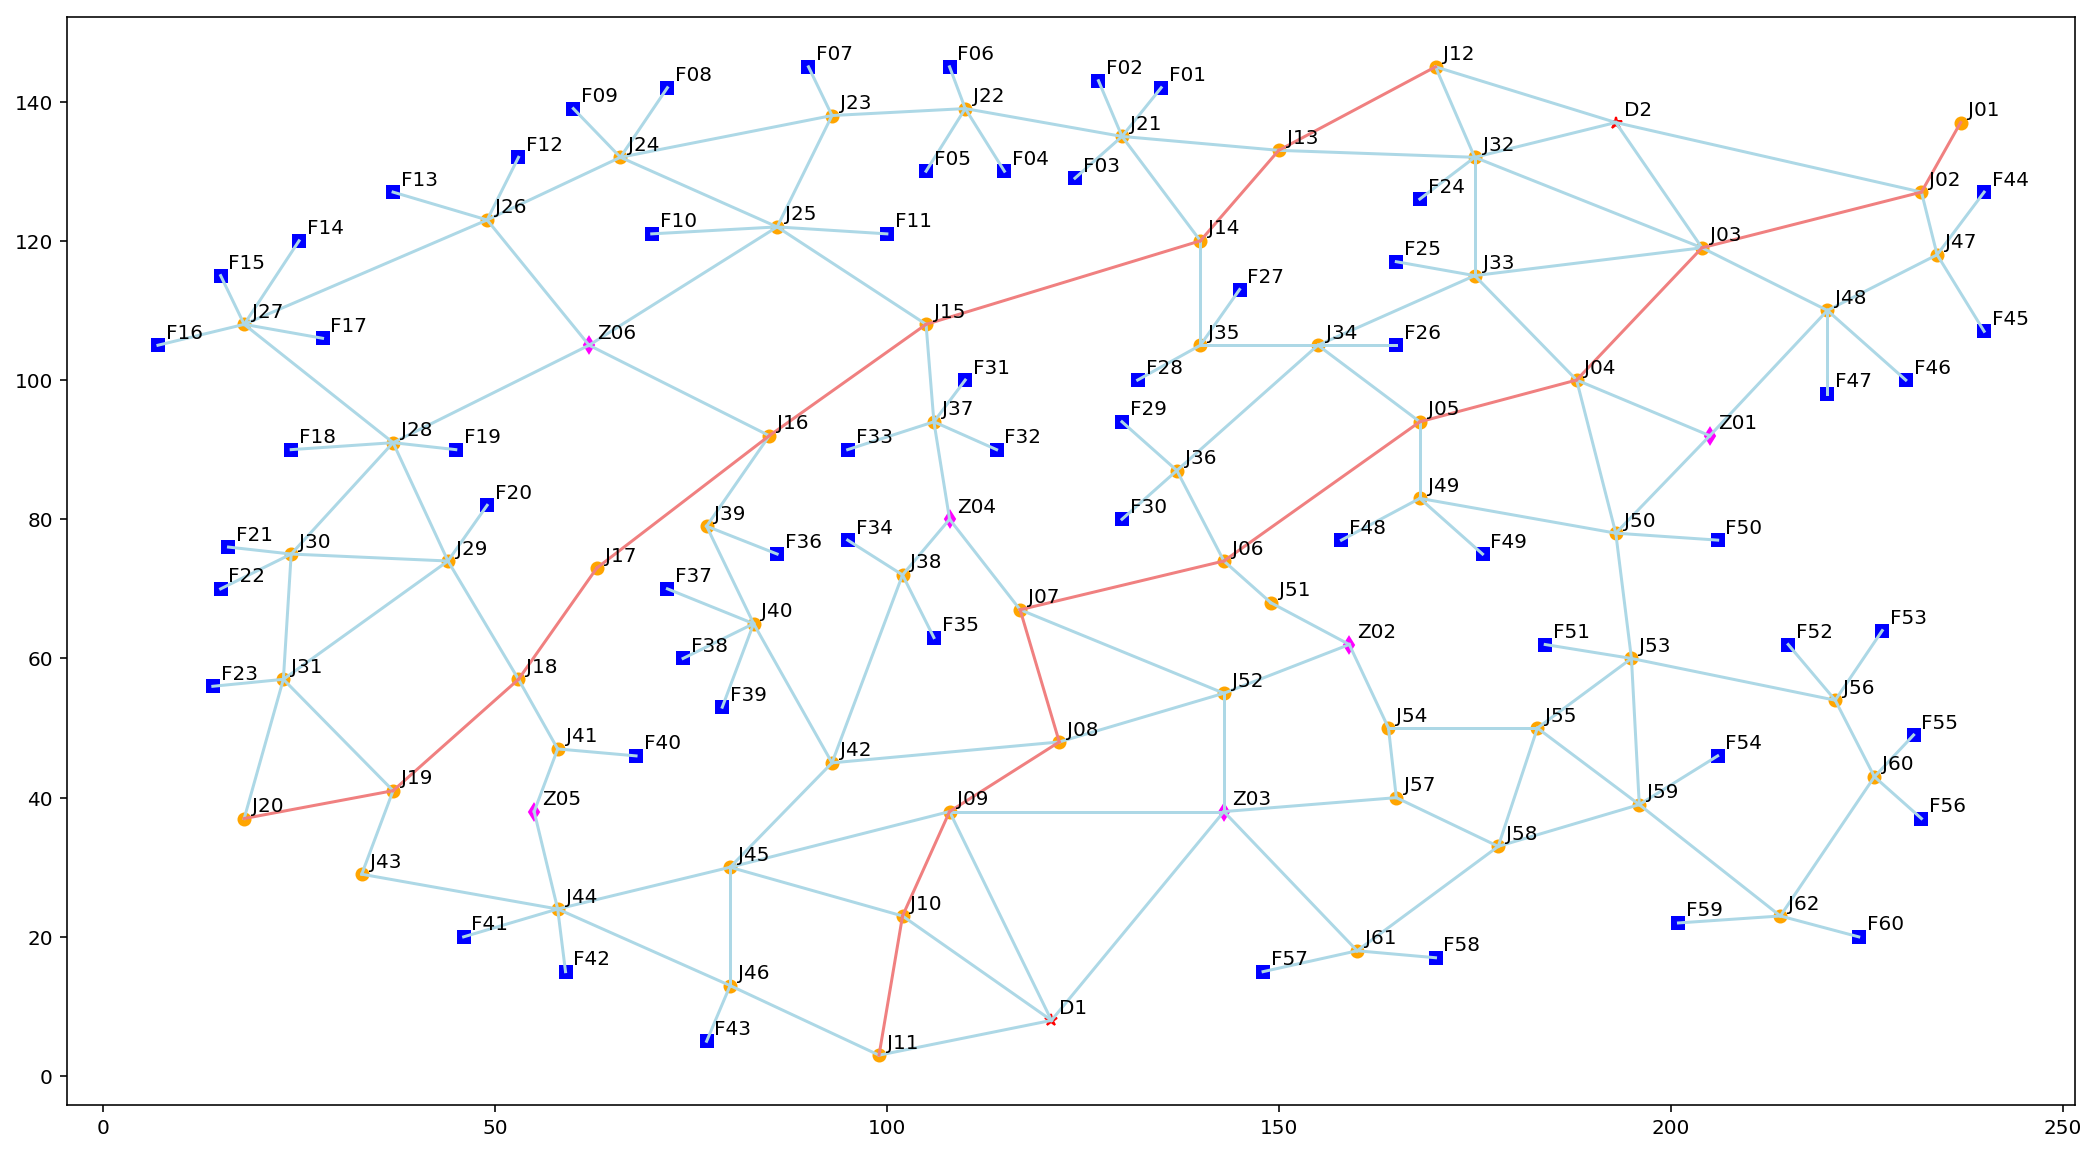

In [18]:
# Plot all line styles.
fig, ax = plt.subplots(figsize=(18, 10))
for idx, row in coord_df.iterrows():
    if idx.startswith('D'):
        ax.plot(row.x, row.y, marker='*', color='red')
    if idx.startswith('F'):
        ax.plot(row.x, row.y, marker='s', color='blue')
    if idx.startswith('J'):
        ax.plot(row.x, row.y, marker='o', color='orange')
    if idx.startswith('Z'):
        ax.plot(row.x, row.y, marker='d', color='magenta')
    
    ax.text(row.x+1, row.y+1, idx)
    
for node_1, node_2 in pairs_no_repeat_1:
    xx = [coord_df.loc[node_names[node_1]].x, coord_df.loc[node_names[node_2]].x]
    yy = [coord_df.loc[node_names[node_1]].y, coord_df.loc[node_names[node_2]].y]
    ax.plot(xx, yy, color='lightblue')
#     print(node_names[node_1], node_names[node_2])
#     break

for node_1, node_2 in pairs_no_repeat_2:
    xx = [coord_df.loc[node_names[node_1]].x, coord_df.loc[node_names[node_2]].x]
    yy = [coord_df.loc[node_names[node_1]].y, coord_df.loc[node_names[node_2]].y]
    ax.plot(xx, yy, color='lightcoral')
    
    


## Generate distance matrix

In [19]:
distance_df

distance
D1  D1     0.000000
    D2   147.732867
    Z01  118.793939
    Z02   66.030296
    Z03   37.202150
    Z04   73.164199
    Z05   72.498276
    Z06  113.534136
    F01  134.729358
    F02  135.133268
    F03  121.037184
    F04  122.147452
    F05  123.044707
    F06  137.615406
    F07  140.463518
    F08  142.677959
    F09  144.506055
    F10  123.975804
    F11  114.934764
    F12  141.421356
    F13  145.660564
    F14  147.512711
    F15  150.615404
    F16  149.682998
    F17  135.103664
    F18  127.015747
    F19  111.803399
    F20  103.247276
    F21  125.095963
    F22  122.800651
...             ...
J62 J33   99.924972
    J34  101.019800
    J35  110.453610
    J36  100.124922
    J37  129.247824
    J38  122.249744
    J39  148.003378
    J40  137.568165
    J41  157.835357
    J42  122.983739
    J43  181.099420
    J44  156.003205
    J45  134.182711
    J46  134.372616
    J47   97.082439
    J48   87.206651
    J49   75.604233
    J50   58.872744
    J51   79.056942
    J52   77.878110
    J53   41.593269
    J54   56.824291
    J55   41.109610
    J56   31.780497
    J57   51.865210
    J58   37.363083
    J59   24.083189
    J60   23.323808
    J61   54.230987
    J62    0.000000

[16900 rows x 1 columns]

In [20]:
distance_df.loc['D1']

,distance
D1,0.000000
D2,147.732867
Z01,118.793939
Z02,66.030296
Z03,37.202150
Z04,73.164199
Z05,72.498276
Z06,113.534136
F01,134.729358
F02,135.133268


In [21]:
connected_pairs.shape

(350, 2)

In [22]:
connected_pairs[1, 1]

76

In [23]:
distance_array = np.zeros(shape=(130, 130))
for node_1, node_2 in connected_pairs:
    distance_array[node_1, node_2] = distance_df.loc[node_names[node_1], node_names[node_2]]
distance_array

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  23.32380758],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,  23.32380758,
          0.        ,   0.        ]])

In [24]:
print(node_name_to_index['Z04'])
print(node_name_to_index['J38'])

5
105


In [25]:
distance_array[5, 105]

10.0

In [26]:
distance_array[distance_array==0] = 1e5

In [27]:
distance_array

array([[  1.00000000e+05,   1.00000000e+05,   1.00000000e+05, ...,
          1.00000000e+05,   1.00000000e+05,   1.00000000e+05],
       [  1.00000000e+05,   1.00000000e+05,   1.00000000e+05, ...,
          1.00000000e+05,   1.00000000e+05,   1.00000000e+05],
       [  1.00000000e+05,   1.00000000e+05,   1.00000000e+05, ...,
          1.00000000e+05,   1.00000000e+05,   1.00000000e+05],
       ..., 
       [  1.00000000e+05,   1.00000000e+05,   1.00000000e+05, ...,
          1.00000000e+05,   1.00000000e+05,   2.33238076e+01],
       [  1.00000000e+05,   1.00000000e+05,   1.00000000e+05, ...,
          1.00000000e+05,   1.00000000e+05,   1.00000000e+05],
       [  1.00000000e+05,   1.00000000e+05,   1.00000000e+05, ...,
          2.33238076e+01,   1.00000000e+05,   1.00000000e+05]])

## Save data

In [28]:
np.savetxt("distance_matrix.csv", distance_array, delimiter=",")

In [29]:
data_to_dump = {}
data_to_dump['distance_array'] = distance_array
data_to_dump['node_names'] = node_names
data_to_dump['node_name_to_index'] = node_name_to_index
data_to_dump['connection_array'] = connection_array
data_to_dump['coord_dict'] = coord_dict
data_to_dump['pairs_no_repeat_1'] = pairs_no_repeat_1
data_to_dump['pairs_no_repeat_2'] = pairs_no_repeat_2


import pickle
# pickle.dump(data_to_dump, open('data.p', 'wb'))

## load data test

In [30]:
import pickle
data_load = pickle.load(open('data.p', 'rb'))
data_load

{'connection_array': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]]),
 'coord_dict': {'D1': (121, 8),
  'D2': (193, 137),
  'F01': (135, 142),
  'F02': (127, 143),
  'F03': (124, 129),
  'F04': (115, 130),
  'F05': (105, 130),
  'F06': (108, 145),
  'F07': (90, 145),
  'F08': (72, 142),
  'F09': (60, 139),
  'F10': (70, 121),
  'F11': (100, 121),
  'F12': (53, 132),
  'F13': (37, 127),
  'F14': (25, 120),
  'F15': (15, 115),
  'F16': (7, 105),
  'F17': (28, 106),
  'F18': (24, 90),
  'F19': (45, 90),
  'F20': (49, 82),
  'F21': (16, 76),
  'F22': (15, 70),
  'F23': (14, 56),
  'F24': (168, 126),
  'F25': (165, 117),
  'F26': (165, 105),
  'F27': (145, 113),
  'F28': (132, 100),
  'F29': (130, 94),
  'F30': (130, 80),
  'F31': (110, 100),
  'F32': (114, 90),
  'F33': (95, 90),
  'F34': (95, 77),
  'F35': (106, 63),
  'F36': (

# CHECKPOINT